# Proyecto Sprint 6
### Descripción del Proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.
Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

### Paso 1. Abre el archivo de datos y estudia la información general 

In [3]:
# Primero voy a importar todas las librerías que tengo en mi bloc de notas y que son las que he utilizado en el transcurso del curso
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from scipy import stats as st

In [4]:
df = pd.read_csv(r"C:\Users\oscar\Documents\Pandas_practice\datasets\games.csv")

### Paso 2. Prepara los datos

In [6]:
df.info()
print()
df.sample(n=10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1986,Tales of Destiny,PS,1997.0,Role-Playing,0.09,0.06,0.83,0.07,NaN,NaN,NaN
4178,MTV Music Generator,PS,1999.0,Misc,0.26,0.18,0.00,0.03,NaN,NaN,NaN
1444,Disney Princess: Enchanted Journey,Wii,2007.0,Adventure,1.22,0.03,0.00,0.09,NaN,4.3,E
8648,Pachi-Slot Kanzen Kouryaku 3: Universal Koushi...,PS,1998.0,Misc,0.00,0.00,0.15,0.01,NaN,NaN,NaN
141,Kinect Sports,X360,2010.0,Sports,3.92,1.73,0.03,0.51,73.0,7.4,E10+
438,Spider-Man,PS,2000.0,Action,1.70,1.25,0.02,0.16,87.0,9,E
13663,BeatMania IIDX 16: Empress + Premium Best,PS2,2009.0,Simulation,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3187,Monster Hunter 2,PS2,NaN,Role-Playing,0.00,0.00,0.63,0.00,NaN,NaN,NaN
5825,Shrek Swamp Kart Speedway,GBA,2002.0,Racing,0.22,0.08,0.00,0.01,27.0,8.9,E
8770,Gunslingers,Wii,2010.0,Shooter,0.07,0.06,0.00,0.02,NaN,tbd,T


In [7]:
# Convertir nombres de columnas a minúsculas
new_column_names = []

for col in df.columns:
    new_col = col.strip().lower().replace(' ', '_')
    new_column_names.append(new_col)

df.columns = new_column_names


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
print(df['year_of_release'].isna().sum())
print(df['critic_score'].isna().sum())
print(df['user_score'].isna().sum())


269
8578
6701


##### Voy a eliminar los valore faltantes en year_of_release ya que no son muchos por lo tanto no va a afectar nuestro análisis. No es viable rellenar con la media o la moda, ya que eso introduciría ruido temporal y sesgaría los análisis por año.

##### Para critic_score, los valores faltantes pueden deberse a que estos juegos no tuvieron una crítica por ser juegos de bajo perfil. Vamos a trabajar con subconjuntos que sí tengan datos de crítica en caso de que se necesiten más adelante.

##### Para user_score vamos a convertir "tdb" a "NaN" y convertir a float. No conviene rellenar con valores arbitrarios para evitar distorsionar la correlación o promedio. 'tbd' (to be determined) indica que aún no hay puntuación asignada, lo cual equivale conceptualmente a un dato faltante.

##### Valores NaN en rating se mantienen. Es demasiada pérdida eliminar más de 6,000 filas. Es una columna categórica que no considero es crítica para la mayoría de los análisis, por ahora.

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')

In [12]:
df['critic_score'] = df['critic_score'].astype('Int64')  # Acepta NaN

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)

In [14]:
print(df['year_of_release'].isna().sum())
print(df['critic_score'].isna().sum())
print(df['user_score'].isna().sum())
df.info()
df.head()

0
8463
8983
<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(5), int32(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [15]:
df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [16]:
df = df.dropna(subset=['name'])
df = df.dropna(subset=['genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

##### Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [18]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
print(df.sample(n=5))

                                   name platform  year_of_release       genre  \
3379          Littlest Pet Shop: Jungle       DS             2008  Simulation   
12694           Brave: A Warrior's Tale      Wii             2009      Action   
3650    The Amazing Spider-Man 2 (2014)      PS4             2014      Action   
3587                          Manhunt 2      PS2             2007      Action   
1939   Grand Theft Auto: Chinatown Wars      PSP             2009      Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
3379       0.34      0.20      0.00         0.06          <NA>         NaN   
12694      0.05      0.00      0.00         0.00            48         NaN   
3650       0.20      0.25      0.02         0.09          <NA>         NaN   
3587       0.27      0.21      0.00         0.07            67         7.8   
1939       0.28      0.49      0.03         0.27            90         7.3   

      rating  total_sales  
3379       E    

### Paso 3. Analiza los datos

#### Juegos lanzados por año

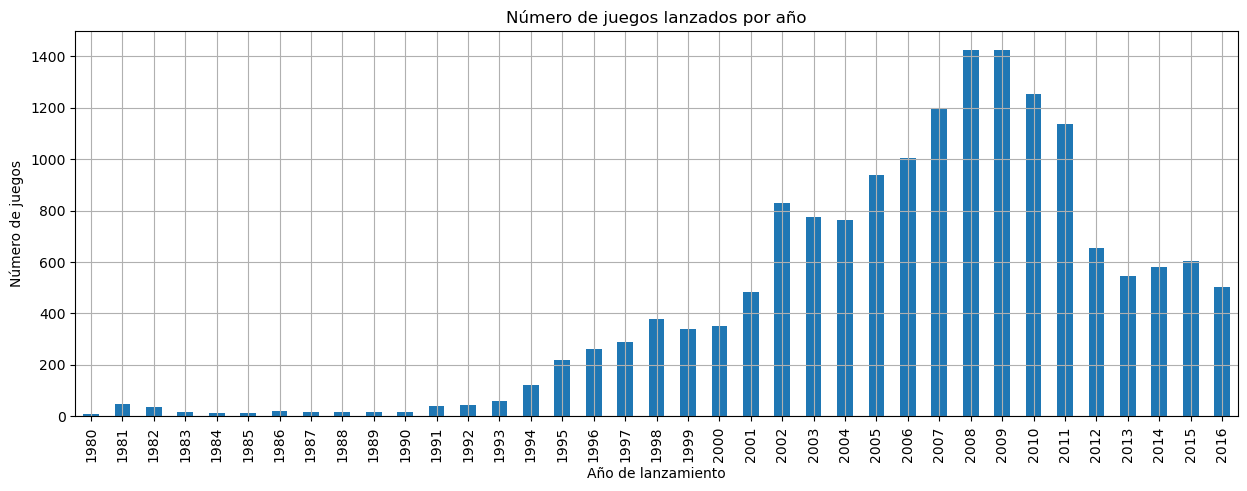

In [21]:
games_per_year = df.groupby('year_of_release')['name'].count()
games_per_year.plot(kind='bar', figsize=(15,5), title='Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.grid(True)
plt.show()

##### ¿Son significativos los datos de cada período? No todos los periodos son igualmente significativos para el análisis actual. Aunque la base de datos contiene juegos desde 1980, los datos anteriores a 2002 no son representativos por las siguientes razones:

1.- Volumen de datos muy bajo:
+ Entre 1980 y 2001, el número de juegos lanzados por año es muy bajo.
+ Esto puede deberse a una menor documentación o registro en las plataformas actuales, lo que sesga cualquier análisis que se quiera hacer con estos años.

2.- Evolución tecnológica e industrial:
+ Antes de 2002, el mercado de videojuegos era mucho más limitado y menos globalizado.
+ A partir de 2002, la industria se masificó gracias a consolas como PS2, Xbox y el crecimiento de PC gaming.

3.- Comparabilidad limitada:
+ Analizar juegos de 1980 con respecto a los de 2015 no es útil porque las plataformas, la distribución, y los consumidores eran totalmente distintos.

4.- Tendencia de mercado realista:
+ A partir de 2002 se observa una tendencia estable y creciente que refleja mejor el comportamiento del mercado moderno de videojuegos.

###### Los datos a partir de 2002 son los más significativos para este análisis. Permiten estudiar tendencias actuales, entender el mercado y comparar géneros, plataformas y rendimiento de ventas con mayor realismo y representatividad.

#### Variación en ventas por plataforma

In [24]:
# Agrupamos por plataforma y sumamos las ventas totales con la columna que creamos anteriormente
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


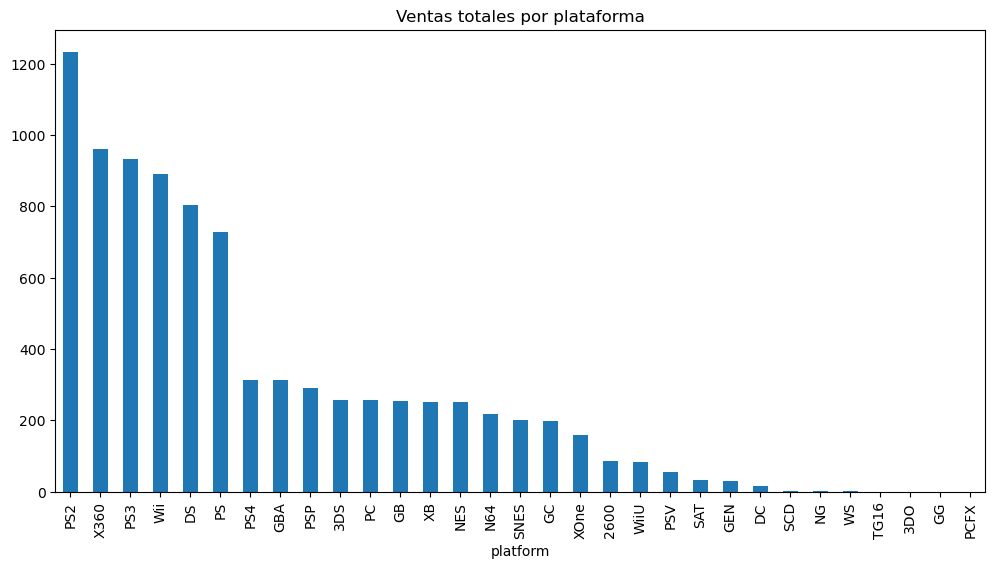

In [25]:
# Ventas por plataforma
platform_sales.plot(kind='bar', figsize=(12,6))
plt.title('Ventas totales por plataforma')
plt.show()

In [26]:
# Filtraremos por las plataformas que vendieron mas de $100M USD
top_platforms = platform_sales[platform_sales >100].index
#Ahora filtramos el DF original para quedarnos con esas plataformas y reducir el ruido en el gráfico que vamos a generar
df_top = df[df['platform'].isin(top_platforms)]

<Figure size 1800x2000 with 0 Axes>

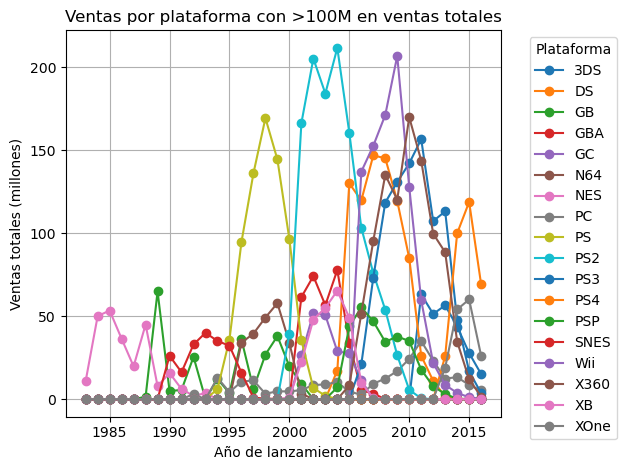

In [27]:
#Vamos a crear un gráfico de ventas por plataforma a lo largo de los años
platform_year_sales = df_top.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

plt.figure(figsize=(18, 20))
platform_year_sales.plot(kind='line', marker='o')
plt.title('Ventas por plataforma con >100M en ventas totales')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [28]:
# Identificamos las plataformas que ya no tienen ventas recientes
last_year = df['year_of_release'].max()
active_last_5_years = df[df['year_of_release'] >= (last_year - 5)]['platform'].unique()

discontinued_platforms = []
for platform in top_platforms:
    if platform not in active_last_5_years:
        last_sale_year = df[df['platform'] == platform]['year_of_release'].max()
        lifespan = last_sale_year - df[df['platform'] == platform]['year_of_release'].min()
        discontinued_platforms.append((platform, last_sale_year, lifespan))
        
print("Plataformas desaparecidas:")
for platform, last_year, lifespan in discontinued_platforms:
    print(f"{platform}: Último año {last_year}, Ciclo de vida {lifespan} años")

Plataformas desaparecidas:
PS: Último año 2003, Ciclo de vida 9 años
GBA: Último año 2007, Ciclo de vida 7 años
GB: Último año 2001, Ciclo de vida 13 años
XB: Último año 2008, Ciclo de vida 8 años
NES: Último año 1994, Ciclo de vida 11 años
N64: Último año 2002, Ciclo de vida 6 años
SNES: Último año 1999, Ciclo de vida 9 años
GC: Último año 2007, Ciclo de vida 6 años


In [29]:
# Calculamos el ciclo de vida promedio de las plataformas
platform_lifespans = []
for platform in df['platform'].unique():
    years = df[df['platform'] == platform]['year_of_release'].dropna()
    if len(years) > 0:
        lifespan = years.max() - years.min()
        platform_lifespans.append(lifespan)

print(f"\nCiclo de vida promedio: {np.mean(platform_lifespans):.1f} años")
print(f"Ciclo de vida máximo: {max(platform_lifespans)} años")
print(f"Ciclo de vida mínimo: {min(platform_lifespans)} años")


Ciclo de vida promedio: 7.6 años
Ciclo de vida máximo: 31 años
Ciclo de vida mínimo: 0 años


**Análisis de Plataformas: Conclusiones**

**Plataformas históricamente populares actualmente inactivas**  
El análisis revela que plataformas que dominaron el mercado en su momento como PS2 (con ventas récord de $1,233M), Xbox 360 ($961M), Wii, PS3 y Nintendo DS ya no registran ventas significativas. Otras plataformas clásicas como la PlayStation original (9 años de actividad), Game Boy Advance (7 años) y Xbox original (8 años) también han desaparecido del mercado. Estas plataformas tuvieron un impacto significativo durante sus ciclos de vida pero fueron reemplazadas por nuevas generaciones de hardware.

**Ciclo de vida de las plataformas**  
Las plataformas de videojuegos muestran un patrón consistente de vida útil promedio de 7-8 años, con tres fases claras: 2-3 años de crecimiento inicial, 3-4 años de madurez donde alcanzan su pico de ventas, y 1-2 años de declive antes de ser discontinuadas. La excepción notable es PC, que lleva 31+ años activa debido a su naturaleza de plataforma abierta y constantemente actualizable. Las plataformas más exitosas superan consistentemente los $600M en ventas durante su ciclo de vida.

**Transiciones generacionales y lecciones para 2017**  
Se observa un solapamiento de 1-2 años entre generaciones, donde las nuevas plataformas coexisten con sus predecesoras. Para la planificación de 2017, los datos sugieren enfocarse en plataformas en su fase de crecimiento/madurez como PS4 y Xbox One (ambas en su 3er-4to año, punto óptimo del ciclo). Nintendo Switch, aunque recién lanzada, representa una apuesta estratégica pero con mayor riesgo. Las plataformas en declive como Wii U y PS Vita deberían recibir menor atención en la estrategia comercial. El histórico demuestra que las franquicias exitosas en plataformas dominantes (como PS2 y X360 en su momento) suelen mantener su relevancia en las sucesoras.

**Selección del periodo de análisis**
+ Con base en el análisis anterior, observamos que el boom de lanzamientos fue de 2002 a 2009 con pico en 2008-2009. A partir de 2010 las cifras bajan pero aún hay lanzamientos significativos. Antes del 2001 hay muy pocos lanzamientos lo cuál puede sesgar el análisis actual. Para construir un modelo que prediga o planifique 2017, debemos enfocarnos en los datos más recientes y relevantes cuando el mercado actual ya estaba bien establecido.

+ El periodo recomendado para el análisis es de 2013 a 2016. Por qué? Porque incluye los últimos 4 años completos del dataset, muestra plataformas activas en el presente, es lo suficientemente reciente para representar las condiciones del mercado de 2017 y porque tiene un volumen de datos representativo sin incluir plataformas obsoletas.

In [32]:
# Nuevo df filtrado por año de lanzamiento entre 2013 a 2016
df_recent = df[df['year_of_release'].between(2013, 2016)]
df_recent.info()
print()
df_recent.sample(n=8)

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(1), float64(6), int32(1), object(4)
memory usage: 220.2+ KB



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15202,Thomas and Friends: Steaming around Sodor,3DS,2015,Action,0.00,0.02,0.00,0.00,<NA>,NaN,NaN,0.02
12925,Batman: A Telltale Game Series,PS3,2016,Adventure,0.01,0.04,0.00,0.01,<NA>,NaN,NaN,0.06
16612,Bakumatsu Rock: Ultra Soul,PSP,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01
14112,Macross ? Scramble,PSV,2016,Action,0.00,0.00,0.04,0.00,<NA>,NaN,NaN,0.04
1403,Rise of the Tomb Raider,XOne,2015,Adventure,0.55,0.70,0.02,0.11,86,8.0,M,1.38
7113,Guitar Hero Live,X360,2015,Misc,0.13,0.08,0.00,0.02,<NA>,5.5,T,0.23
8030,Metal Gear Solid V: The Phantom Pain,X360,2015,Action,0.12,0.04,0.00,0.02,<NA>,7.2,M,0.18
11710,Sumikko Gurashi: Mura o Tsukurundesu,3DS,2016,Misc,0.00,0.00,0.08,0.00,<NA>,NaN,NaN,0.08


In [33]:
recent_platform_sales = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(recent_platform_sales)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


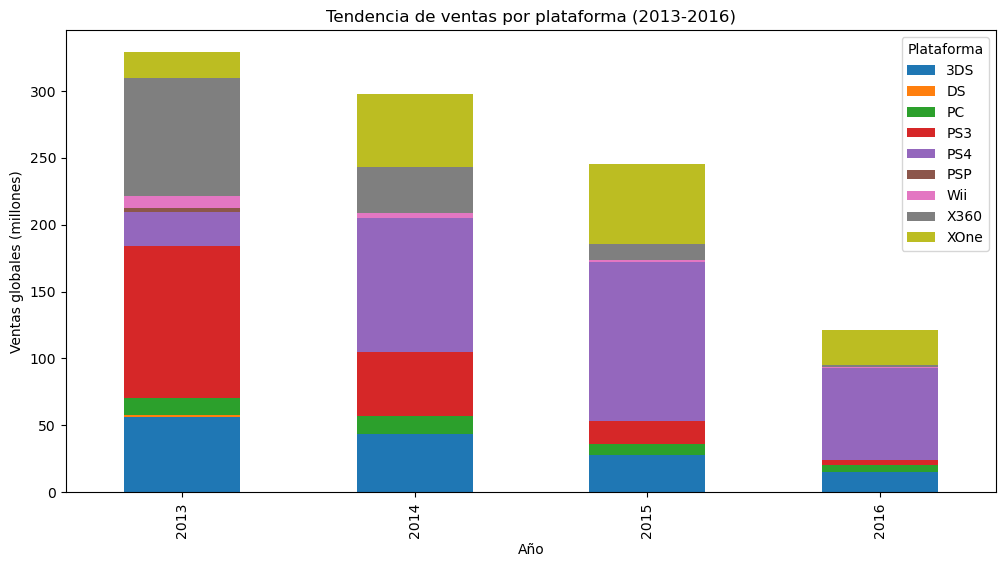

In [34]:
top_platforms = platform_sales[platform_sales > 100].index  
platform_trends = df_recent[df_recent['platform'].isin(top_platforms)]

# Agrupamos por año y plataforma
trend_data = platform_trends.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack().fillna(0)

# Gráfico
trend_data.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Tendencia de ventas por plataforma (2013-2016)')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.legend(title='Plataforma')
plt.show()


**Conclusiones**

Durante el período de 2013 a 2016, las plataformas que generaron mayores ingresos en ventas globales fueron PS4, PS3, XOne, 3DS y X360. Estas plataformas concentraron la mayor parte del mercado, destacándose especialmente por su rendimiento en distintos años.

En 2013, las plataformas dominantes fueron PS3, X360 y 3DS, lo cual refleja la inercia de la generación previa de consolas que aún mantenía fuerza en el mercado. Sin embargo, a partir del 2014, con el lanzamiento de las consolas de nueva generación PS4 y XOne, se observa un cambio de liderazgo. Ambas plataformas comienzan a ganar terreno rápidamente, alcanzando su punto máximo en ventas en 2015, año en que el PS4 se consolida como la consola más rentable de ese periodo.

Por otro lado, plataformas como 3DS muestran una tendencia descendente en ventas a lo largo de estos cuatro años, indicando una pérdida de popularidad o una transición hacia nuevas tecnologías móviles y consolas. En contraste, la plataforma PC mantiene un nivel de ventas relativamente constante, aunque con volúmenes más bajos comparados con consolas.

Finalmente, plataformas como DS, PS y Wii muestran una clara desaparición del mercado: ya en 2013 registran ventas mínimas, y en los años siguientes no generan prácticamente ninguna venta, lo cual evidencia su obsolescencia comercial para este periodo.

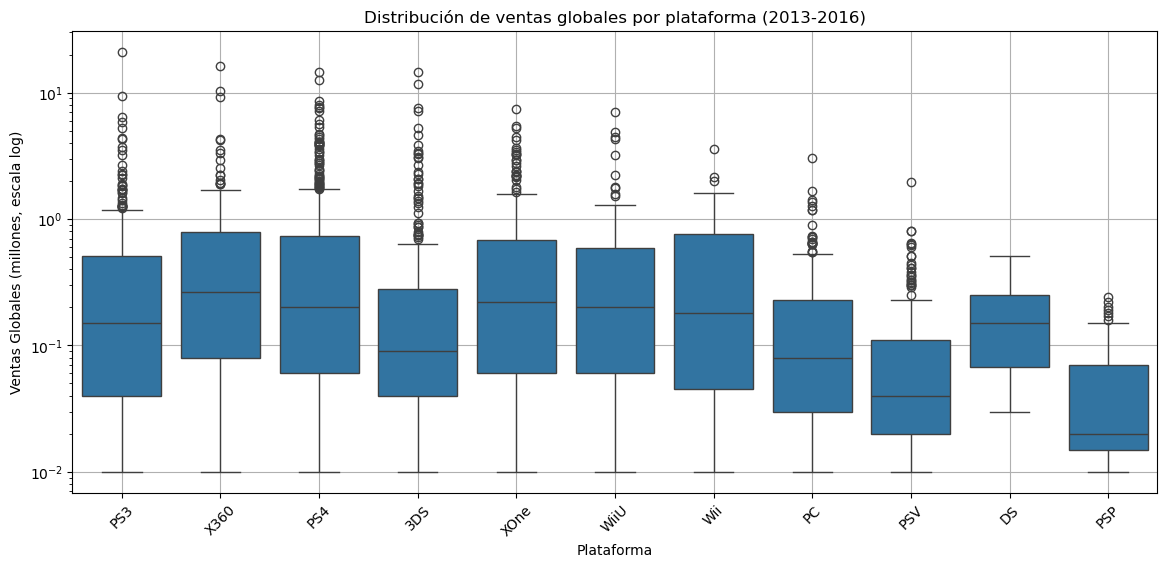

In [36]:
# Creamos un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

plt.figure(figsize=(14,6))
sns.boxplot(data=df_recent, x='platform', y='total_sales')
plt.yscale('log') 
plt.title('Distribución de ventas globales por plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones, escala log)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


##### La escala logarítmica permite una mejor visualización al proporcionar una separación proporcional entre valores en diferentes órdenes de magnitud.

**Análisis del diagrama de caja:**

+ Al analizar la distribución de ventas globales por plataforma para el periodo 2013-2016, se observa una alta presencia de valores atípicos (outliers) en todas las plataformas. Esto sugiere que aunque la mayoría de los juegos venden cantidades moderadas, existen títulos que logran cifras de ventas extraordinarias.
+ Las ventas promedio (representadas por la mediana) para plataformas como PS3, X360, PS4, XOne, WiiU, Wii y DS son relativamente similares, ubicándose aproximadamente entre 0.1 y 0.2 millones de copias vendidas. Por otro lado, plataformas como 3DS, PC, PSV y PSP presentan ventas promedio más bajas, indicando un menor volumen de ventas por título en comparación con las principales consolas.
+ Respecto a la dispersión, las consolas principales presentan una amplia variedad de resultados de ventas entre sus juegos, mientras que plataformas como PC y PSV muestran una dispersión menor, reflejando una mayor homogeneidad en sus resultados de ventas, aunque en un rango más bajo.
+ En resumen, las consolas de sobremesa de Sony y Microsoft dominaron en cuanto a ventas promedio de juegos, mientras que plataformas portátiles o de menor popularidad reflejaron cifras inferiores.

#### Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular.

In [40]:
ps4_data = df_recent[df_recent['platform'] == 'PS4']
ps4_data.info()
print()
print(ps4_data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    int32  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    Int64  
 9   user_score       257 non-null    float64
 10  rating           255 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: Int64(1), float64(6), int32(1), object(4)
memory usage: 38.7+ KB

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales       

##### Observo que hay varios valores nulos en critic_score, user_score y rating. No los voy a eliminar ya que representan casi un tercio de información y perderíamos bastante. Por lo tanto, para los gráficos de dispersión y correlaciones, solo trabajaremos con los registros que sí tienen ambos scores disponibles (user_score y critic_score).

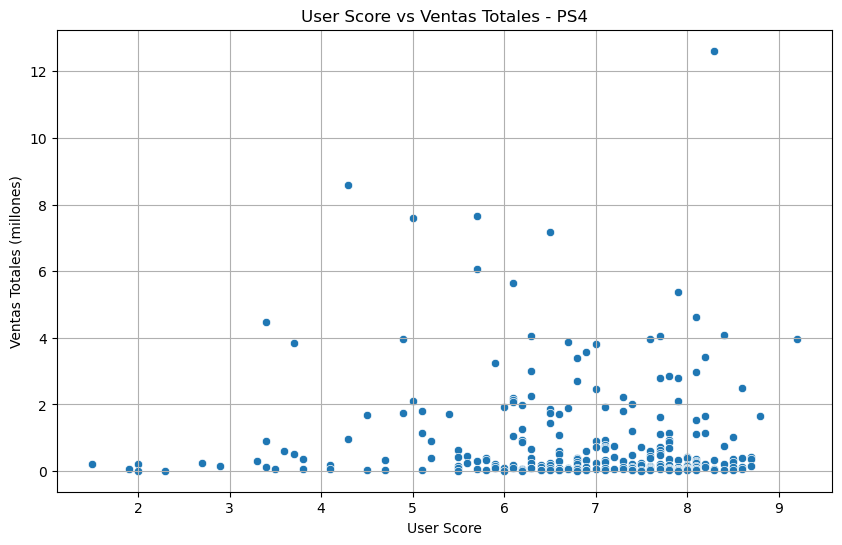

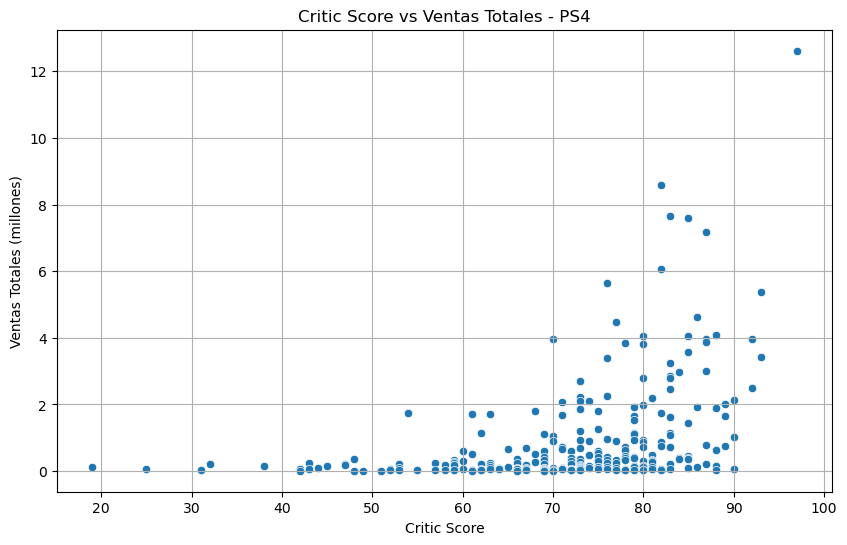

Correlación entre User Score y Ventas Totales (PS4): -0.03
Correlación entre Critic Score y Ventas Totales (PS4): 0.41


In [42]:
# Trabajaremos solo con filas donde haya puntuaciones disponibles
ps4_data_scores = ps4_data.dropna(subset=['user_score', 'critic_score'])

# Scatterplot User Score vs Ventas
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4_data_scores, x='user_score', y='total_sales')
plt.title('User Score vs Ventas Totales - PS4')
plt.xlabel('User Score')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

# Scatterplot Critic Score vs Ventas
plt.figure(figsize=(10,6))
sns.scatterplot(data=ps4_data_scores, x='critic_score', y='total_sales')
plt.title('Critic Score vs Ventas Totales - PS4')
plt.xlabel('Critic Score')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

# Correlaciones
user_correlation = ps4_data_scores[['user_score', 'total_sales']].corr().iloc[0,1]
critic_correlation = ps4_data_scores[['critic_score', 'total_sales']].corr().iloc[0,1]

print(f"Correlación entre User Score y Ventas Totales (PS4): {user_correlation:.2f}")
print(f"Correlación entre Critic Score y Ventas Totales (PS4): {critic_correlation:.2f}")

**Análisis de la relación entre calificaciones (User Score y Critic Score) y Ventas Totales en PS4**

**User Score vs Ventas Totales (PS4)**
+ La correlación entre el user_score y las ventas totales es -0.03, lo cual indica una relación nula o muy débil negativa entre ambas variables.
+ El gráfico de dispersión refleja esta falta de relación, mostrando una gran dispersión de puntos sin una tendencia clara.
+ La mayoría de los juegos se agrupan entre calificaciones de 6 a 8 y ventas menores a 2 millones. Sin embargo, hay juegos con bajas calificaciones (incluso de 2 a 4) que lograron ventas considerables, lo cual sugiere que las ventas no dependen directamente de la percepción de los usuarios.
+ Se concluye que el user_score no tiene un impacto relevante en las ventas para juegos de PS4.

**Critic Score vs Ventas Totales (PS4)**
+ La correlación entre critic_score y ventas totales es 0.41, lo que indica una relación positiva moderada.
+ Aunque no hay una línea clara de tendencia, el gráfico muestra una menor dispersión de puntos en comparación con el gráfico anterior, especialmente en el rango de calificaciones entre 57 y 83, donde la mayoría de juegos tienen ventas menores a 2 millones.
+ A partir de una calificación de 78 aprox, comienzan a aparecer juegos con ventas más altas, e incluso hay un juego con score de ~83 que supera los 8 millones en ventas.
+ Esto sugiere que una buena calificación por parte de la crítica podría influir positivamente en las ventas, aunque no de forma determinante.

**Conclusión general:**
+ Las calificaciones de la crítica tienen mayor correlación con las ventas que las calificaciones de los usuarios.
+ Sin embargo, ni una ni otra parecen ser factores decisivos por sí solos, lo que sugiere que otros elementos como marketing, popularidad de la franquicia o fecha de lanzamiento podrían jugar un papel más importante en el éxito comercial de un videojuego.

### Ventas de los mismos juegos en otras plataformas

In [75]:
# Primero vamos a seleccionar los juegos que se encuentran en PS4
ps4_games = ps4_data['name'].unique()

In [77]:
# Filtraremos el df_recent por los juegos que se encuentran en PS4 y en otras plataformas
same_games_other_platforms = df_recent[df_recent['name'].isin(ps4_games)]

In [83]:
#Ahora veremos las ventas de cada juego por plataforma
same_games_other_platforms.groupby(['name','platform'])['total_sales'].sum().reset_index()

,name,platform,total_sales
0,7 Days to Die,PS4,0.14
1,7 Days to Die,XOne,0.05
2,Adventure Time: Finn & Jake Investigations,3DS,0.09
3,Adventure Time: Finn & Jake Investigations,PS3,0.08
4,Adventure Time: Finn & Jake Investigations,PS4,0.10
...,...,...,...
1123,ZombiU,PS4,0.06
1124,ZombiU,XOne,0.01
1125,Zombie Army Trilogy,PS4,0.20
1126,Zombie Army Trilogy,XOne,0.11


##### Vamos a construir una Pivot Table para ver mejor los resultados

In [94]:
pivot_sales = same_games_other_platforms.pivot_table(
    index = 'name',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
)

pivot_sales.sample(n=10)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
MotoGP 15,NaN,NaN,NaN,0.05,0.17,NaN,NaN,NaN,NaN,NaN,0.03
Lego Star Wars: The Force Awakens,0.13,NaN,NaN,0.17,0.71,NaN,0.10,NaN,0.15,0.12,0.29
God Eater Off Shot:Shiou-hen Twin Pack & Animation Vol.5,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN
Raven's Cry,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
Skylanders SWAP Force,0.24,NaN,NaN,1.02,0.38,NaN,NaN,2.15,0.58,1.32,0.31
Hitman (2016),NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.01
Jikkyou Powerful Pro Baseball 2016,NaN,NaN,NaN,0.12,0.17,NaN,0.18,NaN,NaN,NaN,NaN
Akiba's Trip: Undead & Undressed,NaN,NaN,NaN,0.11,0.11,NaN,0.15,NaN,NaN,NaN,NaN
Worms: WMD,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,0.01


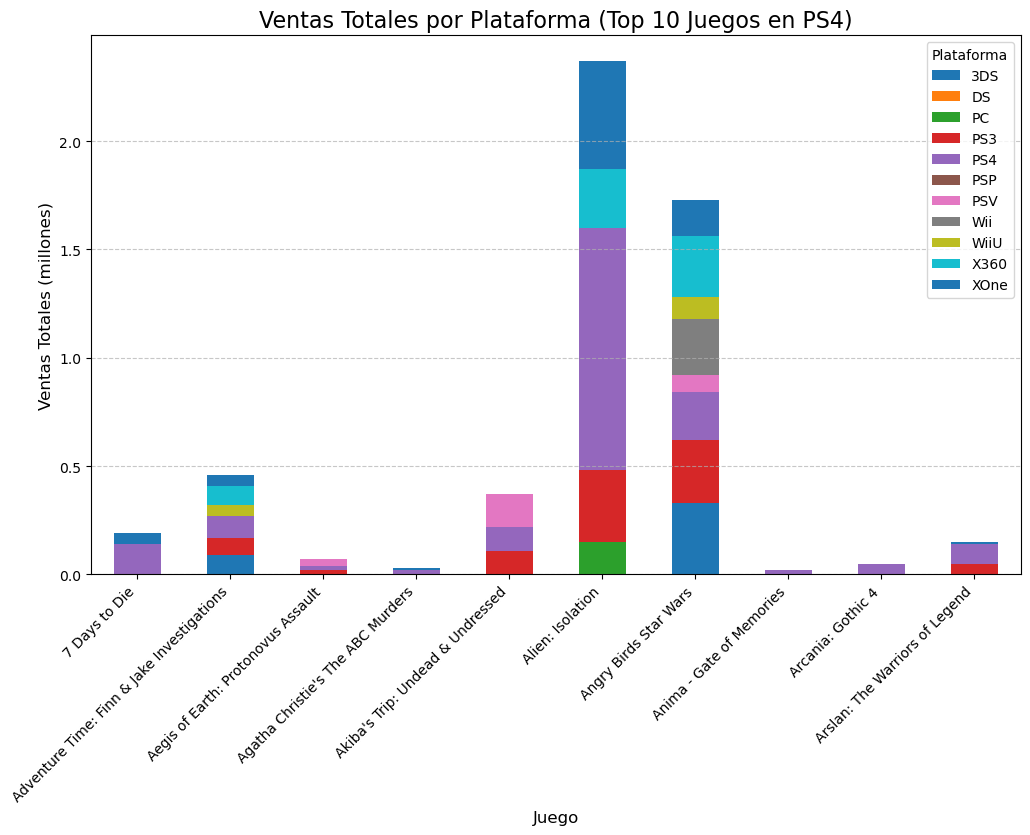

In [96]:
# Seleccionamos los primeros 10 juegos de la pivot
pivot_sales_top10 = pivot_sales.head(10)

# Creamos la gráfica
pivot_sales_top10.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Ventas Totales por Plataforma (Top 10 Juegos en PS4)', fontsize=16)
plt.xlabel('Juego', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.legend(title='Plataforma')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Conclusiones sobre la comparación de ventas en otras plataformas:**
+ Al comparar las ventas de los mismos juegos en diferentes plataformas mediante una tabla dinámica, se observa que PS4 supera en ventas a otras plataformas en la mayoría de los casos analizados.
+ Hay una presencia significativa de valores NaN en la pivot table, indicando que muchos juegos no están disponibles en todas las plataformas.
+ La principal competencia de PS4 es Xbox One (XOne), dado que es la plataforma con más coincidencias en el análisis.
+ La existencia de varios juegos que solo aparecen en PS4 (y no en XOne) sugiere que los títulos exclusivos siguen siendo una estrategia importante para impulsar las ventas en esta consola.
+ En general, los datos refuerzan que PS4 tuvo un desempeño fuerte en ventas, especialmente en juegos donde tuvo exclusividad o ventaja competitiva.

### Distribución general de los juegos por género

In [103]:
# Vamos a agrupar los datos por género
genre_sales = df_recent.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

C:\Users\oscar\AppData\Local\Temp\ipykernel_28276\2381386831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')


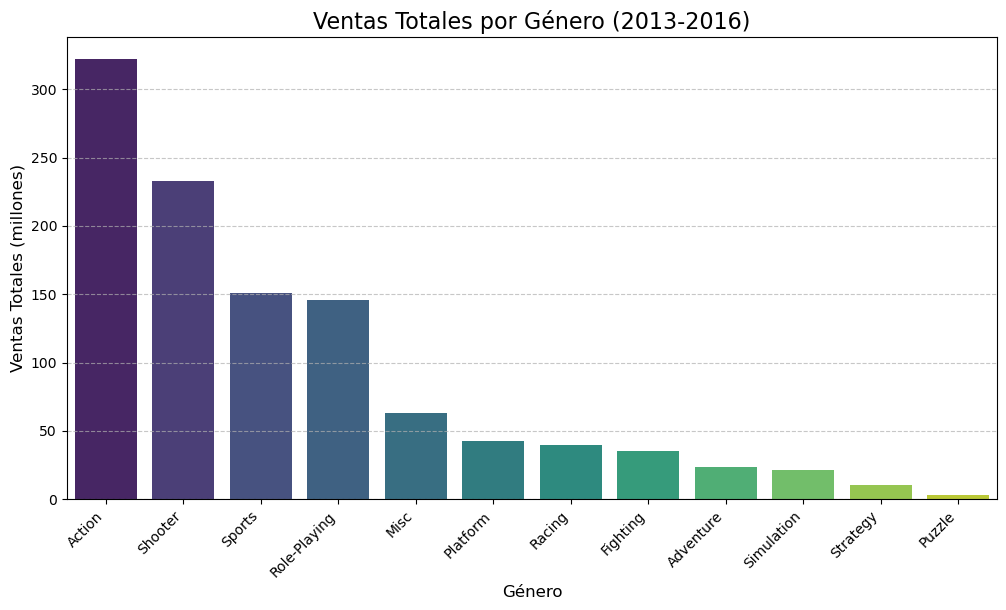

In [105]:
# Ahora vamos a graficar para tener una mejor idea
plt.figure(figsize=(12,6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Ventas Totales por Género (2013-2016)', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Conclusiones sobre el análisis de ventas por género:**

+ El análisis de ventas totales por género muestra que los juegos de acción son claramente los más populares, alcanzando más de 321 millones en ventas. Esto refleja la gran preferencia de los usuarios por experiencias dinámicas, inmersivas y de alta interacción. A este género le siguen shooter (232.98 millones) y sports (150.65 millones), que también son géneros de alta intensidad y competitividad, atrayendo principalmente a jugadores jóvenes y audiencias muy amplias.
+ El género de role-playing (RPG) se posiciona como el cuarto más vendido con 145.89 millones, evidenciando que las experiencias narrativas profundas y de progresión de personajes tienen un fuerte mercado. Estos cuatro géneros son los únicos que superan los 100 millones en ventas.
+ En contraste, géneros como puzzle (3.17 millones), strategy (10.08 millones) y simulation (21.76 millones) presentan ventas mucho menores. Esto sugiere que, si bien tienen nichos de mercado fieles, su alcance general es limitado en comparación con géneros más orientados a la acción y aventura.
+ En general, podemos concluir que los géneros más exitosos tienden a ofrecer experiencias de juego intensas, rápidas y con un atractivo más universal, mientras que los géneros más especializados tienden a tener mercados más pequeños y específicos.

## Paso 4. Crea un perfil de usuario para cada región (NA, UE, JP)

#### Las cinco plataformas principales por región

In [118]:
# Agrupamos las ventas por plataforma en cada región
platform_na = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_eu = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_jp = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

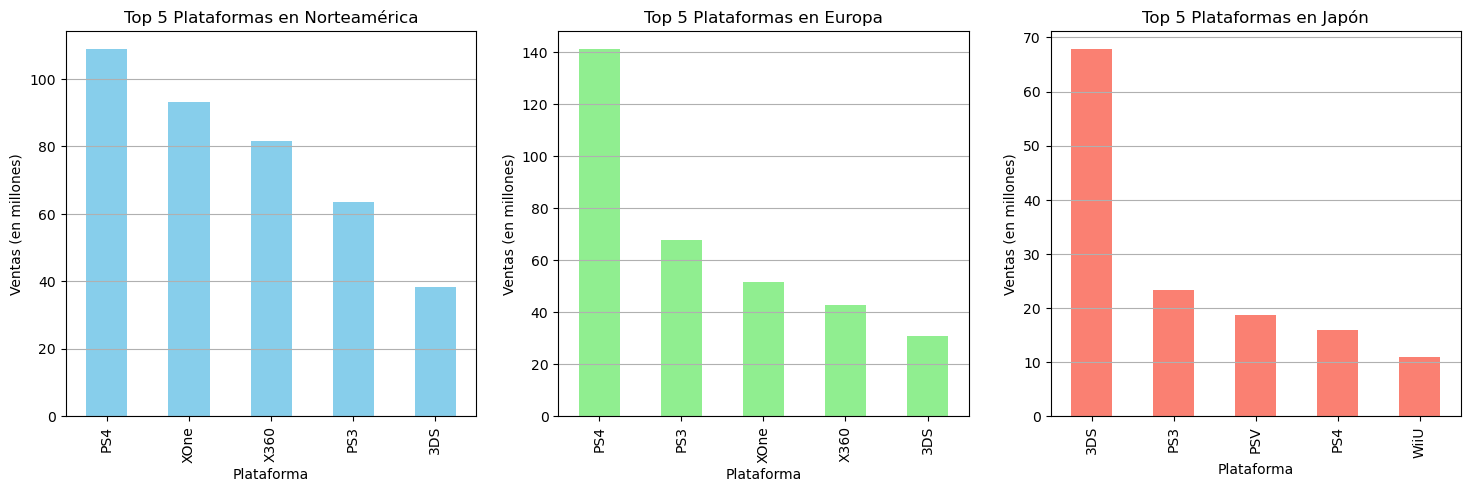

In [125]:
# Creamos los gráficos de barras por región
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Norteamérica
platform_na.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Top 5 Plataformas en Norteamérica')
axes[0].set_ylabel('Ventas (en millones)')
axes[0].set_xlabel('Plataforma')
axes[0].grid(axis='y')

# Europa
platform_eu.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Top 5 Plataformas en Europa')
axes[1].set_ylabel('Ventas (en millones)')
axes[1].set_xlabel('Plataforma')
axes[1].grid(axis='y')

# Japón
platform_jp.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Top 5 Plataformas en Japón')
axes[2].set_ylabel('Ventas (en millones)')
axes[2].set_xlabel('Plataforma')
axes[2].grid(axis='y')

**Conclusiones: Top 5 Plataformas por Región**
+ En Norteamérica (NA) y Europa (EU), la plataforma más popular fue PS4, con ventas de 108.74M y 141.09M respectivamente. En cambio, en Japón (JP), la preferencia fue distinta: la 3DS lideró con 67.81M en ventas, probablemente debido al estilo de vida japonés más móvil y a la influencia local de Nintendo.
+ En NA, la segunda plataforma más vendida fue XOne (93.13M), seguida por X360 (81.66M) y PS3 (63.50M). Aquí, la diferencia entre el primer y segundo lugar es menor, mostrando un mercado más repartido entre consolas actuales y pasadas.
+ En EU, el segundo lugar lo ocupó PS3 (67.81M), pero con una diferencia significativa respecto al primer lugar (PS4). Esto sugiere que los europeos mantienen mayor fidelidad a las plataformas japonesas, prefiriéndolas incluso sobre la consola americana XOne (51.59M).
+ En JP, después de la 3DS, la segunda y tercera plataformas fueron PS3 (23.35M) y PSV (18.59M) respectivamente. El PS4, aunque popular en el resto del mundo, ocupa apenas el cuarto lugar con 15.96M de ventas. Esto reafirma la fuerte preferencia japonesa por consolas portátiles y sistemas más tradicionales.
+ Conclusión general: Japón muestra un comportamiento de consumo notablemente diferente al de NA y EU, con una mayor preferencia por consolas portátiles. Mientras tanto, NA y EU comparten tendencias similares con diferencias sutiles, siendo PS4 la favorita en ambos mercados.

#### Los cinco géneros principales por región

In [133]:
# Agrupamos las ventas por género en cada región
genre_sales = df_recent.groupby('genre').agg({'na_sales':'sum','eu_sales':'sum','jp_sales':'sum'})

In [135]:
#Oredenamos y seleccionamos el Top 5
top5_na = genre_sales['na_sales'].sort_values(ascending=False).head(5)
top5_eu = genre_sales['eu_sales'].sort_values(ascending=False).head(5)
top5_jp = genre_sales['jp_sales'].sort_values(ascending=False).head(5)

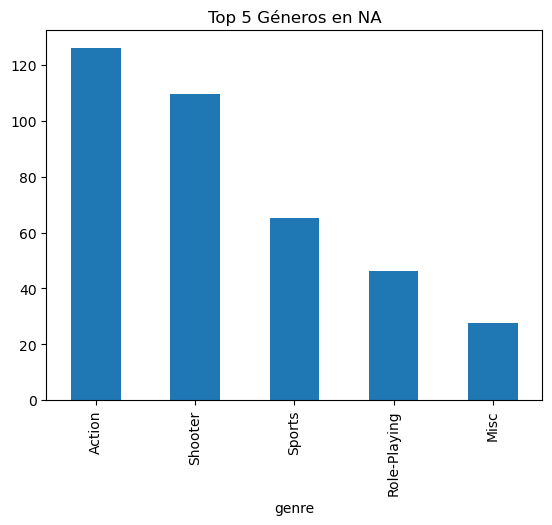

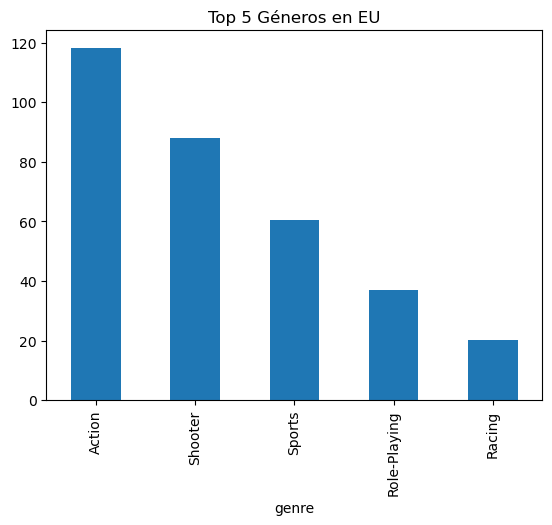

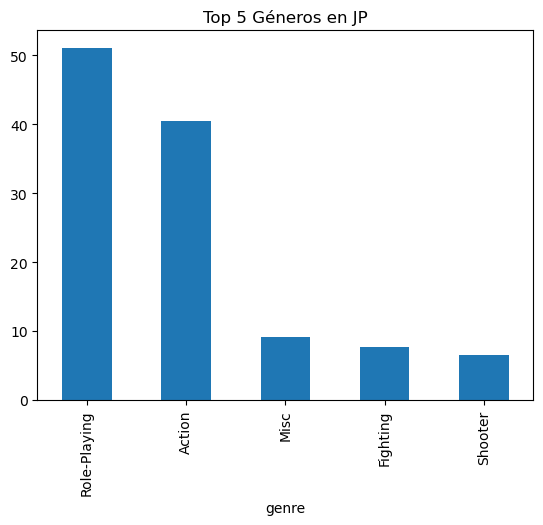

In [145]:
# Creamos los gráficos
top5_na.plot(kind='bar', title='Top 5 Géneros en NA')
plt.show()

top5_eu.plot(kind='bar', title='Top 5 Géneros en EU')
plt.show()

top5_jp.plot(kind='bar', title='Top 5 Géneros en JP')
plt.show()

**Conclusiones - Géneros principales por región**
+ Norteamérica (NA):
Los géneros de Action y Shooter dominan claramente el mercado, ambos superando los 100 millones en ventas. El género Sports ocupa el tercer lugar con algo más de 60 millones, mientras que Misc se encuentra en el límite inferior del Top 5. Esto sugiere una fuerte preferencia en NA por juegos rápidos, competitivos y llenos de adrenalina.

+ Europa (EU):
Similar a Norteamérica, Action y Shooter lideran las ventas. Sin embargo, en Europa destaca el género Racing en el Top 5, reflejando posiblemente la tradición automovilística del continente. Aunque los patrones son parecidos a los de NA, las ventas son ligeramente menores para algunos géneros.

+ Japón (JP):
El mercado japonés muestra patrones distintos: Role-Playing es el género más popular con más de 50 millones en ventas, seguido por Action. Otros géneros como Misc, Fighting y Shooter tienen ventas significativamente más bajas. Esto refleja la fuerte conexión cultural de Japón con los RPGs tradicionales y un menor interés por géneros más occidentales como los Shooters.

+ Conclusión general:
Los factores culturales, históricos y de estilo de vida tienen una influencia significativa en las preferencias de género de videojuegos en cada región. Japón se diferencia claramente de NA y EU, prefiriendo narrativas profundas y experiencias inmersivas sobre la acción y la competición rápida.

#### Clasificación ESRB

In [153]:
# Agrupamos por rating y sumamos las ventas por región
rating_sales = df_recent.groupby('rating')[['na_sales','eu_sales','jp_sales']].sum()
print(rating_sales)

        na_sales  eu_sales  jp_sales
rating                              
E          79.05     83.36     15.14
E10+       54.24     42.69      5.89
M         165.21    145.32     14.11
T          49.79     41.95     20.59


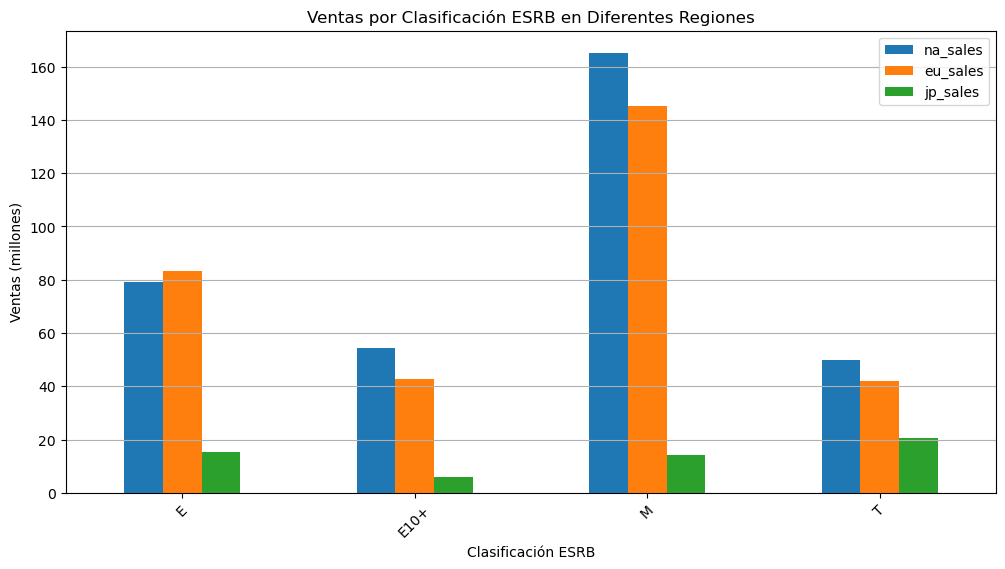

In [155]:
# Creamos la gráfica
rating_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por Clasificación ESRB en Diferentes Regiones')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Conclusiones - Clasificaciones ESRB y su impacto en ventas**
+ Los videojuegos clasificados como M (Mature 17+) dominan las ventas tanto en Norteamérica como en Europa, con 165.21M y 145.32M respectivamente. Sin embargo, en Japón las ventas de este tipo de juegos son mucho menores (14.11M), lo que sugiere una menor aceptación del contenido maduro en esa región.

+ Los juegos clasificados como E (Everyone) también tienen ventas altas en NA (79.05M) y EU (83.36M), mostrando la fuerza de los juegos accesibles para todas las edades. En Japón, el mismo rating logra 15.14M, nuevamente mucho menor que en Occidente.

+ Las clasificaciones E10+ (mayores de 10 años) y T (Teen) (13+) siguen un patrón similar: ventas considerables en NA y EU, pero más modestas en JP.

+ Estos resultados confirman que las diferencias culturales influyen en la popularidad de ciertos tipos de contenido:

+ En Occidente (NA y EU) hay una mayor aceptación de juegos maduros y violentos.

+ En Japón, los juegos con contenido menos explícito o enfocado en narrativas más accesibles parecen tener mayor éxito.

**Por lo tanto, las clasificaciones ESRB sí afectan las ventas en distintas regiones, siendo importante considerar el tipo de contenido a la hora de planificar lanzamientos internacionales.**

## Paso 5. Prueba de hipótesis.

#### Hipótesis 1: Calificaciones promedio de los usuarios para Xbox One y PC
+ Queremos comprobar si las calificaciones promedio de usuarios para las plataformas Xbox One y PC son iguales.

+ Hipótesis nula: Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.

+ Hipótesis alternativa: Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

+ Elegimos un valor estándar para alfa: 0.05 (5%)

Esto significa que aceptamos un 5% de probabilidad de cometer un error tipo I (rechazar H₀ cuando era cierta).

**Justificación**

Usaremos una prueba t de Student para muestras independientes.

¿Por qué?

+ Estamos comparando promedios de dos grupos independientes (Xbox One y PC).
+ Los tamaños de muestra no necesariamente son iguales, y es posible que las varianzas también difieran.
+ Por eso, usaremos el parámetro equal_var=False para asumir varianzas desiguales en scipy.stats.ttest_ind().



In [166]:
# Filtramos las plataformas deseadas y eliminamos valores nulos
xbox_one_scores = df_recent.query('platform == "XOne"')['user_score'].dropna()
pc_scores = df_recent.query('platform == "PC"')['user_score'].dropna()

# Aplicamos la prueba t de Student para muestras independientes
alpha = 0.05

results = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.')
else:
    print('No se puede rechazar la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio.')

Valor p: 0.14759594013430463
No se puede rechazar la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio.


**Conclusiones de la Hipótesis 1:**

Tras aplicar la prueba t de Student para muestras independientes, obtuvimos un valor p de 0.1476, el cual es mayor que nuestro umbral de significancia (α = 0.05).

Esto indica que no podemos rechazar la hipótesis nula. Por lo tanto, no existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre las plataformas Xbox One y PC.

En resumen, los usuarios califican de manera similar a los juegos en Xbox One y PC.

#### Hipótesis 2: Comparar las calificaciones promedio de los géneros Action y Sports.
+ Hipótesis nula: Las calificaciones promedio de los géneros Action y Sports son iguales.

+ Hipótesis alternativa: Las calificaciones promedio de los géneros Action y Sports son diferentes.

+ Elegimos un valor estándar para alfa: 0.05 (5%)

**Justificación**

Usamos una prueba t de Student para muestras independientes.

¿Por qué?

+ Estamos comparando dos grupos diferentes (géneros Action y Sports).

+ Son muestras independientes (el género de un juego no depende del otro).

+ Las variables son cuantitativas (calificaciones de usuario).

In [171]:
# Filtramos las calificaciones de los géneros Action y Sports
action_scores = df_recent[df_recent['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_recent[df_recent['genre'] == 'Sports']['user_score'].dropna()

# Prueba t de Student para muestras independientes
alpha = 0.05 
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('Valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.')
else:
    print('No se puede rechazar la hipótesis nula: no hay una diferencia significativa en las calificaciones promedio.')


Valor p: 1.4460039700704315e-20
Se rechaza la hipótesis nula: hay una diferencia significativa en las calificaciones promedio.


**Conclusiones de la Hipótesis 2:**

Hay una diferencia significativa entre las calificaciones promedio de los juegos de Acción y Deportes.

**Justificación en formulación de hpótesis**

Porque cuando comparas dos grupos (en este caso, dos géneros) lo estándar es suponer que no hay diferencia (nula) a menos que los datos muestren lo contrario.

## Paso 6: Conlusión General.

En este proyecto analizamos los datos de ventas, géneros, plataformas y calificaciones de videojuegos para planificar una campaña publicitaria de cara al 2017.

**Principales hallazgos:**

+ Plataformas más populares:
PS4 lidera en Norteamérica (NA) y Europa (EU), mientras que en Japón (JP) la preferencia es por consolas portátiles como 3DS, debido posiblemente a diferencias en el estilo de vida y preferencias culturales.

+ Géneros más exitosos:
Action y Shooter dominan en NA y EU, mientras que en JP el género Role-Playing tiene una popularidad mucho mayor. Esto muestra cómo la cultura y tradición de cada región influye en el tipo de videojuegos que prefieren.

+ Clasificaciones ESRB:
Las clasificaciones afectan las ventas. En NA y EU, los juegos para adultos (Mature) tienen mayores ventas, mientras que en JP predominan los juegos clasificados para todas las edades (Everyone y Teen), evidenciando diferencias culturales respecto al contenido.

**Pruebas de hipótesis:**

+ No encontramos diferencias significativas entre las calificaciones promedio de usuarios para las plataformas Xbox One y PC.

+ Sí encontramos diferencias significativas entre las calificaciones promedio de los géneros Acción y Deportes.

**Conclusión final:**

*Los patrones de venta de videojuegos están fuertemente influenciados por las características culturales de cada región.
Por lo tanto, al planificar campañas publicitarias y lanzamientos de nuevos títulos, es fundamental segmentar bien el mercado por región, considerando las preferencias de género, tipo de plataforma y adecuación del contenido según las clasificaciones ESRB.
Además, el análisis estadístico ayuda a tomar decisiones más informadas y con base en evidencia, optimizando así las estrategias comerciales.*